https://www.kaggle.com/datasets/airplane2230/apparel-image-dataset-2

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"kimdonghyun9797","key":"565c01e1e82a97d45625f770dd682f0e"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Permission Warning 방지
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d airplane2230/apparel-image-dataset-2
!unzip -qq '/content/apparel-image-dataset-2.zip'

 96% 240M/249M [00:03<00:00, 68.3MB/s]
100% 249M/249M [00:03<00:00, 69.0MB/s]


## 1. 데이터 가져오기

In [ ]:
import pandas as pd

DATA_PATH = '/content/clothes_dataset'
train_df = pd.read_csv('/content/train.csv')
val_df = pd.read_csv('/content/val.csv')
test_df = pd.read_csv('/content/test.csv')

print(train_df.head())

   Unnamed: 0                                              image  black  blue  \
0           0  ./clothes_dataset\blue_shorts\256d854b55ac32ea...    0.0   1.0   
1           1  ./clothes_dataset\red_pants\584f778aece14f07c2...    0.0   0.0   
2           2  ./clothes_dataset\green_pants\ec543ca241cefb2b...    0.0   0.0   
3           3  ./clothes_dataset\brown_shorts\c8db9e0f7010592...    0.0   0.0   
4           4  ./clothes_dataset\white_dress\551373c80717c5b0...    0.0   0.0   

   brown  green  red  white  dress  shirt  pants  shorts  shoes  
0    0.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
1    0.0    0.0  1.0    0.0    0.0    0.0    1.0     0.0    0.0  
2    0.0    1.0  0.0    0.0    0.0    0.0    1.0     0.0    0.0  
3    1.0    0.0  0.0    0.0    0.0    0.0    0.0     1.0    0.0  
4    0.0    0.0  0.0    1.0    1.0    0.0    0.0     0.0    0.0  


In [ ]:
train_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,./clothes_dataset\blue_shorts\256d854b55ac32ea...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,./clothes_dataset\red_pants\584f778aece14f07c2...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,./clothes_dataset\green_pants\ec543ca241cefb2b...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,./clothes_dataset\brown_shorts\c8db9e0f7010592...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,./clothes_dataset\white_dress\551373c80717c5b0...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,5573,./clothes_dataset\black_shoes\31e11164a2a206ec...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,5574,./clothes_dataset\white_shoes\00271191db9b1fd6...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,5575,./clothes_dataset\black_pants\afa29481cd27a475...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,5576,./clothes_dataset\green_shoes\aaeba68f98a07bf7...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
class_col = ['black', 'blue', 'brown', 'green', 'red', 'white', 'dress', 'shirt', 'pants', 'shorts', 'shoes']


## 2. 이미지 제너레이터 정의

In [ ]:
# 이미지 제너레이터를 정의합니다.
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1. / 255)
val_datagen = ImageDataGenerator(rescale=1. / 255)

def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

## 3. 모델 구성하기

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import tensorflow as tf

model = Sequential()
# 입력 데이터의 형태를 꼭 명시해야 합니다.
model.add(Flatten(input_shape = (112, 112, 3))) # (112, 112, 3) -> (112 * 112 * 3)
model.add(Dense(128, activation = 'relu')) # 128개의 출력을 가지는 Dense 층
model.add(Dense(64, activation = 'relu')) # 64개의 출력을 가지는 Dense 층
model.add(Dense(11, activation = 'sigmoid')) # 11개의 출력을 가지는 신경망

model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [ ]:
train_df['image'] = train_df['image'].apply(lambda x: '/content'+x[1:].replace('\\','/'))
train_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,/content/clothes_dataset/blue_shorts/256d854b5...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,/content/clothes_dataset/red_pants/584f778aece...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,/content/clothes_dataset/green_pants/ec543ca24...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,3,/content/clothes_dataset/brown_shorts/c8db9e0f...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4,/content/clothes_dataset/white_dress/551373c80...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,5573,/content/clothes_dataset/black_shoes/31e11164a...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5574,5574,/content/clothes_dataset/white_shoes/00271191d...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
5575,5575,/content/clothes_dataset/black_pants/afa29481c...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5576,5576,/content/clothes_dataset/green_shoes/aaeba68f9...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
val_df['image'] = val_df['image'].apply(lambda x: '/content'+x[1:].replace('\\','/'))
val_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,/content/clothes_dataset/black_shirt/caf19003d...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1,/content/clothes_dataset/blue_pants/7e42face2c...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,/content/clothes_dataset/red_dress/d46069bf0d2...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,3,/content/clothes_dataset/blue_dress/fea68beee2...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,4,/content/clothes_dataset/white_shoes/b378e85b8...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2386,2386,/content/clothes_dataset/white_pants/f97327a07...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2387,2387,/content/clothes_dataset/brown_shoes/3568f3e84...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2388,2388,/content/clothes_dataset/black_pants/f4ec70217...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2389,2389,/content/clothes_dataset/blue_dress/1689e0e0ee...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
test_df['image'] = test_df['image'].apply(lambda x: '/content'+x[1:].replace('\\','/'))
test_df

,Unnamed: 0,image,black,blue,brown,green,red,white,dress,shirt,pants,shorts,shoes
0,0,/content/clothes_dataset/blue_shorts/1ec871cdf...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,/content/clothes_dataset/black_pants/0f8eb4509...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,/content/clothes_dataset/white_shoes/1d70ebaec...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,3,/content/clothes_dataset/green_shoes/a4e155f72...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,4,/content/clothes_dataset/blue_shirt/2edd17185a...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3411,3411,/content/clothes_dataset/black_shirt/d76faa497...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3412,3412,/content/clothes_dataset/blue_pants/691dacb127...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3413,3413,/content/clothes_dataset/blue_pants/9b5ac8ce3d...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3414,3414,/content/clothes_dataset/black_pants/7db76af76...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
train_df.to_csv('train.csv')
val_df.to_csv('val.csv')
test_df.to_csv('test.csv')

In [ ]:
batch_size = 32

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_df,
    directory='/content',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    seed=42
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val_df,
    directory='/content',
    x_col = 'image',
    y_col = class_col,
    target_size = (112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

Found 5578 validated image filenames.
Found 2391 validated image filenames.


In [ ]:
import tensorflow as tf

# 러닝레이트의 비율을 유동적으로 변화할 수 있도록 설정함
def scheduler(epoch, learning_rate):
    if epoch < 10:
        return learning_rate  # 처음 10 에포크 동안은 학습률 유지
    else:
        return learning_rate * tf.math.exp(-0.1)  # 10 에포크 이후에는 학습률 감소

# LearningRateScheduler 콜백 객체를 생성. 학습률을 동적으로 조정하기 위해 scheduler 함수 호출
lr_scheduler_cb = tf.keras.callbacks.LearningRateScheduler(scheduler)

# ModelCheckpoint 콜백을 정의합니다.
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint(filepath='best_model.h5',  # 저장할 모델 파일의 경로를 지정합니다.
                                                    monitor='val_acc',  # 모니터링할 지표를 지정합니다. 여기서는 검증 정확도를 사용합니다.
                                                    save_best_only=True,  # 가장 좋은 모델만 저장하도록 설정합니다.
                                                    mode='max',  # 모니터링할 지표의 최적화 방향을 지정합니다. 여기서는 최대화하므로 'max'를 사용합니다.
                                                    verbose=1)  # 저장 동작을 출력합니다.

# EarlyStopping 콜백을 정의합니다.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss',  # 모니터링할 지표를 지정합니다. 여기서는 검증 손실을 사용합니다.
                                                     patience=5,  # 성능이 개선되지 않은 횟수를 지정합니다. 이 값만큼 횟수 동안 성능이 개선되지 않으면 훈련이 중단됩니다.
                                                     mode='min',  # 모니터링할 지표의 최적화 방향을 지정합니다. 여기서는 최소화하므로 'min'을 사용합니다.
                                                     verbose=1)  # EarlyStopping 콜백의 동작을 출력합니다.

model.fit(train_generator,
         steps_per_epoch=get_steps(len(train_df), batch_size),
         validation_data = val_generator,
         validation_steps=get_steps(len(val_df), batch_size),
         callbacks=[lr_scheduler_cb, checkpoint_cb, early_stopping_cb],
         epochs = 20)

Epoch 1/20
175/175 [==============================] - ETA: 0s - loss: 0.3355 - acc: 0.3313
Epoch 1: val_acc improved from -inf to 0.39774, saving model to best_model.h5
175/175 [==============================] - 28s 153ms/step - loss: 0.3355 - acc: 0.3313 - val_loss: 0.2789 - val_acc: 0.3977 - lr: 1.0000e-04


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/20
175/175 [==============================] - ETA: 0s - loss: 0.2576 - acc: 0.4330
Epoch 2: val_acc improved from 0.39774 to 0.51276, saving model to best_model.h5
175/175 [==============================] - 30s 173ms/step - loss: 0.2576 - acc: 0.4330 - val_loss: 0.2410 - val_acc: 0.5128 - lr: 1.0000e-04
Epoch 3/20
175/175 [==============================] - ETA: 0s - loss: 0.2328 - acc: 0.4667
Epoch 3: val_acc improved from 0.51276 to 0.53074, saving model to best_model.h5
175/175 [==============================] - 25s 142ms/step - loss: 0.2328 - acc: 0.4667 - val_loss: 0.2388 - val_acc: 0.5307 - lr: 1.0000e-04
Epoch 4/20
175/175 [==============================] - ETA: 0s - loss: 0.2176 - acc: 0.4871
Epoch 4: val_acc did not improve from 0.53074
175/175 [==============================] - 25s 142ms/step - loss: 0.2176 - acc: 0.4871 - val_loss: 0.2283 - val_acc: 0.5023 - lr: 1.0000e-04
Epoch 5/20
175/175 [==============================] - ETA: 0s - loss: 0.2013 - acc: 0.5063
Epoch

In [ ]:
model = tf.keras.models.load_model('best_model.h5')

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test_df,
    directory='/content',
    x_col='image',
    y_col=class_col,
    target_size=(112, 112),
    color_mode='rgb',
    class_mode='other',
    batch_size=batch_size,
    shuffle=True
)

loss_and_metrics = model.evaluate(test_generator,
                                  steps=get_steps(len(test_df), batch_size))
print('loss_and_metrics : ' + str(loss_and_metrics))

Found 3416 validated image filenames.
107/107 [==============================] - 8s 71ms/step - loss: 0.1856 - acc: 0.5922
loss_and_metrics : [0.18555518984794617, 0.5922130942344666]


In [ ]:
preds = model.predict(test_generator)

107/107 [==============================] - 8s 72ms/step


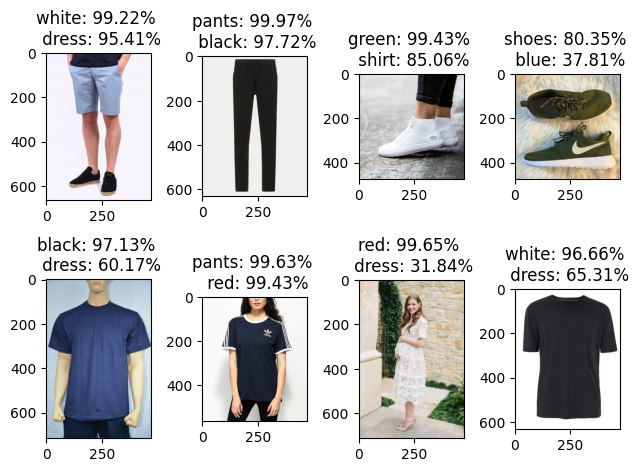

In [ ]:
import matplotlib.pyplot as plt
import cv2

do_preds = preds[:8]

for i, pred in enumerate(do_preds):
    plt.subplot(2, 4, i + 1)
    prob = zip(class_col, list(pred))
    prob = sorted(list(prob), key = lambda z: z[1], reverse = True)[:2]

    image = cv2.imread(test_df['image'][i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    plt.imshow(image)
    plt.title(f'{prob[0][0]}: {round(prob[0][1] * 100, 2)}% \n {prob[1][0]}: {round(prob[1][1] * 100, 2)}%')

plt.tight_layout()